In [1]:
# Notebook Preamble
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

plt.style.use('../maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

# Introduction
* The `sympy` package is a Computer Algebra System (CAS), which has the capabilities of solving math problems symbolically.
* It essentially is an alternative to mathematica and is useful for showing mathematical procedures, especially in jupyter notebook.
* However, it is very slow in some applications; therefore, it is usually not good to use it for automation. Instead, use numerical methods from the `numpy` and `scipy` packages when doing math behind the scenes.

# General Functionality
* `sympy` primarily works by defining symbols and functions of some variable, then doing some operation on them.

## Defining Symbols

---
**Example:** Define the following symbols and functions: 

* Symbols: $x,\ t,\ s,\ \dot{x}$
* Functions: $x(t),\ x(t, s),\ X(s)$

In [2]:
# Use the sp.Symbol() to define a symbol one at a time.
# Use sp.symbols() define multiple symbols at one time
x, t, s, x_dot = sp.symbols(r'x t s \dot{x}')
display(x, t, s, x_dot)

x

t

s

\dot{x}

In [3]:
# For functions, we create instances of the sp.Function() class
x_t, x_ts, X = sp.Function('x')(t), sp.Function('x')(t, s), sp.Function('X')(s)
display(x_t, x_ts, X)

x(t)

x(t, s)

X(s)

---

* You define the function, then determine what it is a function of by passing in the parameters in the function call.

## Substitution

---
**Example:** Create an expression for $x^2y+5yx+10$, then substitute values $x=5,\ y=3$.

In [4]:
x, y = sp.symbols('x y')
expr = x**2*y + 5*x*y + 10
expr

x**2*y + 5*x*y + 10

* You use the `.subs` method for substituting in parameters.

In [5]:
# If multiple arguments, it takes a list of tuples.
expr.subs([
    (x, 5),
    (y, 3)
])

160

In [6]:
# If you wanted to show substitutions without simplifying, this is what you would do
with sp.evaluate(False):
    # Everything within this context manager will not simplify
    expr_subs = expr.subs([
        (x, 5),
        (y, 3)
    ])
display(expr_subs, expr_subs.simplify())

10 + 3*5**2 + 5*5*3

160

In [7]:
# If you wanted to show it as an equation
with sp.evaluate(False):
    expr_subs = expr.subs([
        (x, 5),
        (y, 3)
    ])

# This is called the Equality class (think of it as an equation class too)
# If sympy sees that there are no symbols, it will try to evaluate it as true or false
sp.Eq(expr_subs, expr_subs.simplify(), evaluate=False)

Eq(10 + 3*5**2 + 5*5*3, 160)

---

## Converting from Sympy to Python Function

* The `.subs` method is good for showing basic substitutions, but if you needed to perform many different substitutions (like you would when you are plotting points), then you need to *lambdify* the expression.
* This just means that we need to convert it from a `sympy` object to python function for fast computation.

---
**Example:** Convert the `sympy` expression $f(x)=x^2$ into a python function.

In [8]:
f = x**2  # the variable x was defined above
f

x**2

In [9]:
# Use sp.lambdify() to generate the new function
f_lamb = sp.lambdify(x, f, modules='numpy')  # modules='numpy' tells it to use numpy functions if necessary
f_lamb

<function _lambdifygenerated(x)>

In [10]:
# f_lamb is essentially equivalent to the following function
# def f_lamb(x):
#     return x**2

# Now we can use it like a normal python function
f_lamb(5)

25

In [11]:
x_values = np.array([1, 2, 3, 4])
f_lamb(x_values)

array([ 1,  4,  9, 16])

In addition, you can obtain the raw source code of a lambdified object by using the built in `inspect` module from python.

In [12]:
import inspect

print(inspect.getsource(f_lamb))

def _lambdifygenerated(x):
    return x**2


This can be particularly useful for copying and if you want to perform some analysis in `sympy`, then use the result in a python script file.

---

# Solving Systems of Equations
* Systems can be solved both symbolically and numerically if needed.

---
**Example:** Solve the following system for $x$ and $y$:

$$\begin{cases}
xy+3y+a=7 \\
y+5x=2
\end{cases}$$

In [13]:
x, y, a = sp.symbols('x y a')
eq1 = sp.Eq(x*y + 3*y + a, 7)
eq2 = sp.Eq(y + 5*x, 2)
display(eq1, eq2)

Eq(a + x*y + 3*y, 7)

Eq(5*x + y, 2)

In [14]:
sol = sp.solve([eq1, eq2], (x, y), dict=True)
sol

[{x: -sqrt(20*a + 149)/10 - 13/10, y: sqrt(20*a + 149)/2 + 17/2},
 {x: sqrt(20*a + 149)/10 - 13/10, y: 17/2 - sqrt(20*a + 149)/2}]

* Specifying `dict=True` returns a list of dictionaries where the keys are the variable and the value is the solution.

In [15]:
for d in sol:
    for key, value in d.items():
        display(sp.Eq(key, value))

Eq(x, -sqrt(20*a + 149)/10 - 13/10)

Eq(y, sqrt(20*a + 149)/2 + 17/2)

Eq(x, sqrt(20*a + 149)/10 - 13/10)

Eq(y, 17/2 - sqrt(20*a + 149)/2)

* You can check the solution by substituting it, then simplifying the expression.

In [16]:
# The .lhs method returns the left hand side of the equation
check = eq1.lhs.subs([
    (x, sol[0][x]),
    (y, sol[0][y])
])
check

a + 3*sqrt(20*a + 149)/2 + (-sqrt(20*a + 149)/10 - 13/10)*(sqrt(20*a + 149)/2 + 17/2) + 51/2

In [17]:
check.simplify()

7

---
**Example:** The following equation cannot be solved algebraically. Solve using numerical methods.

$$e^x+x=3$$

In [18]:
eq = sp.Eq(sp.exp(x) + x, 3)
eq

Eq(x + exp(x), 3)

In [19]:
sol = sp.nsolve(eq, x, 1)  # equation, variable, guess
sol

0.792059968430677

---

# Calculus
## Differentiation

---
**Example:** Find the first and second order derivative with respect to $x$ of

$$f(x)=x^3+3xy+x^2$$

In [20]:
f = x**3 + 3*x*y + x**2
f

x**3 + x**2 + 3*x*y

In [21]:
f.diff(x)

3*x**2 + 2*x + 3*y

In [22]:
# For second order derivative:
f.diff(x, 2)

2*(3*x + 1)

---

## Integration

---
**Example:** Find $\int\ln(x)dx$

In [23]:
integral = sp.Integral(sp.log(x), x)
integral

Integral(log(x), x)

* Note that the $\log(x)$ function is equivalent to the $\ln(x)$ function in `sympy`.
* The above example shows the `Integral` class, but you can evaluate it by calling the `.doit()` method. This way of doing things may be desired for making sure that you set it up appropriately. The same concept can be done for other operations like the `Derivative` class.

In [24]:
integral.doit()

x*log(x) - x

In [25]:
# Alternatively, you can use the integrate() method
(sp.log(x)).integrate(x)

x*log(x) - x

---

# Differential Equations
## Solving ODE's

---
**Example:** Solve $y''+y=\tan(x)$

In [26]:
y = sp.Function('y')(x)
eq = sp.Eq(y.diff(x, 2) + y, sp.tan(x))
eq

Eq(y(x) + Derivative(y(x), (x, 2)), tan(x))

In [27]:
sol = sp.dsolve(eq)
sol

Eq(y(x), C2*sin(x) + (C1 + log(sin(x) - 1)/2 - log(sin(x) + 1)/2)*cos(x))

In [28]:
# Checking solution
check = sol.rhs.diff(x, 2) + sol.rhs
check.simplify()

tan(x)

---
**Example:** Solve the system of ODE's with $x(0)=0$ and $y(0)=1$:

$$\begin{cases}
\frac{dx}{dt}=-x+y \\
\frac{dy}{dt}=2x
\end{cases}$$

In [29]:
t = sp.Symbol('t')
x, y = sp.Function('x')(t), sp.Function('y')(t)

eq1 = sp.Eq(x.diff(), -x + y)
eq2 = sp.Eq(y.diff(), 2*x)
display(eq1, eq2)

Eq(Derivative(x(t), t), -x(t) + y(t))

Eq(Derivative(y(t), t), 2*x(t))

In [30]:
sol = sp.dsolve([eq1, eq2], ics={
    x.subs(t, 0): 0,
    y.subs(t, 0): 1
})
sol

[Eq(x(t), exp(t)/3 - exp(-2*t)/3), Eq(y(t), 2*exp(t)/3 + exp(-2*t)/3)]

In [31]:
display(*sol)  # unpacking is the same as display(sol[0], sol[1])

Eq(x(t), exp(t)/3 - exp(-2*t)/3)

Eq(y(t), 2*exp(t)/3 + exp(-2*t)/3)

---
**Example:** Solve $y''-10y'+25y=30x+3$ with $y(0)=1$ and $y'(0)=3$ and plot the function by `lambdifying` the solution.

In [32]:
x = sp.Symbol('x')  # re-defining as symbol because it was previously defined as a function
y = sp.Function('y')(x)
eq = sp.Eq(y.diff(x, 2) - 10*y.diff() + 25*y, 30*x + 3)
eq

Eq(25*y(x) - 10*Derivative(y(x), x) + Derivative(y(x), (x, 2)), 30*x + 3)

In [33]:
sol = sp.dsolve(eq, ics={
    y.subs(x, 0): 1,
    y.diff().subs(x, 0): 3
})
sol

Eq(y(x), 6*x/5 + (2/5 - x/5)*exp(5*x) + 3/5)

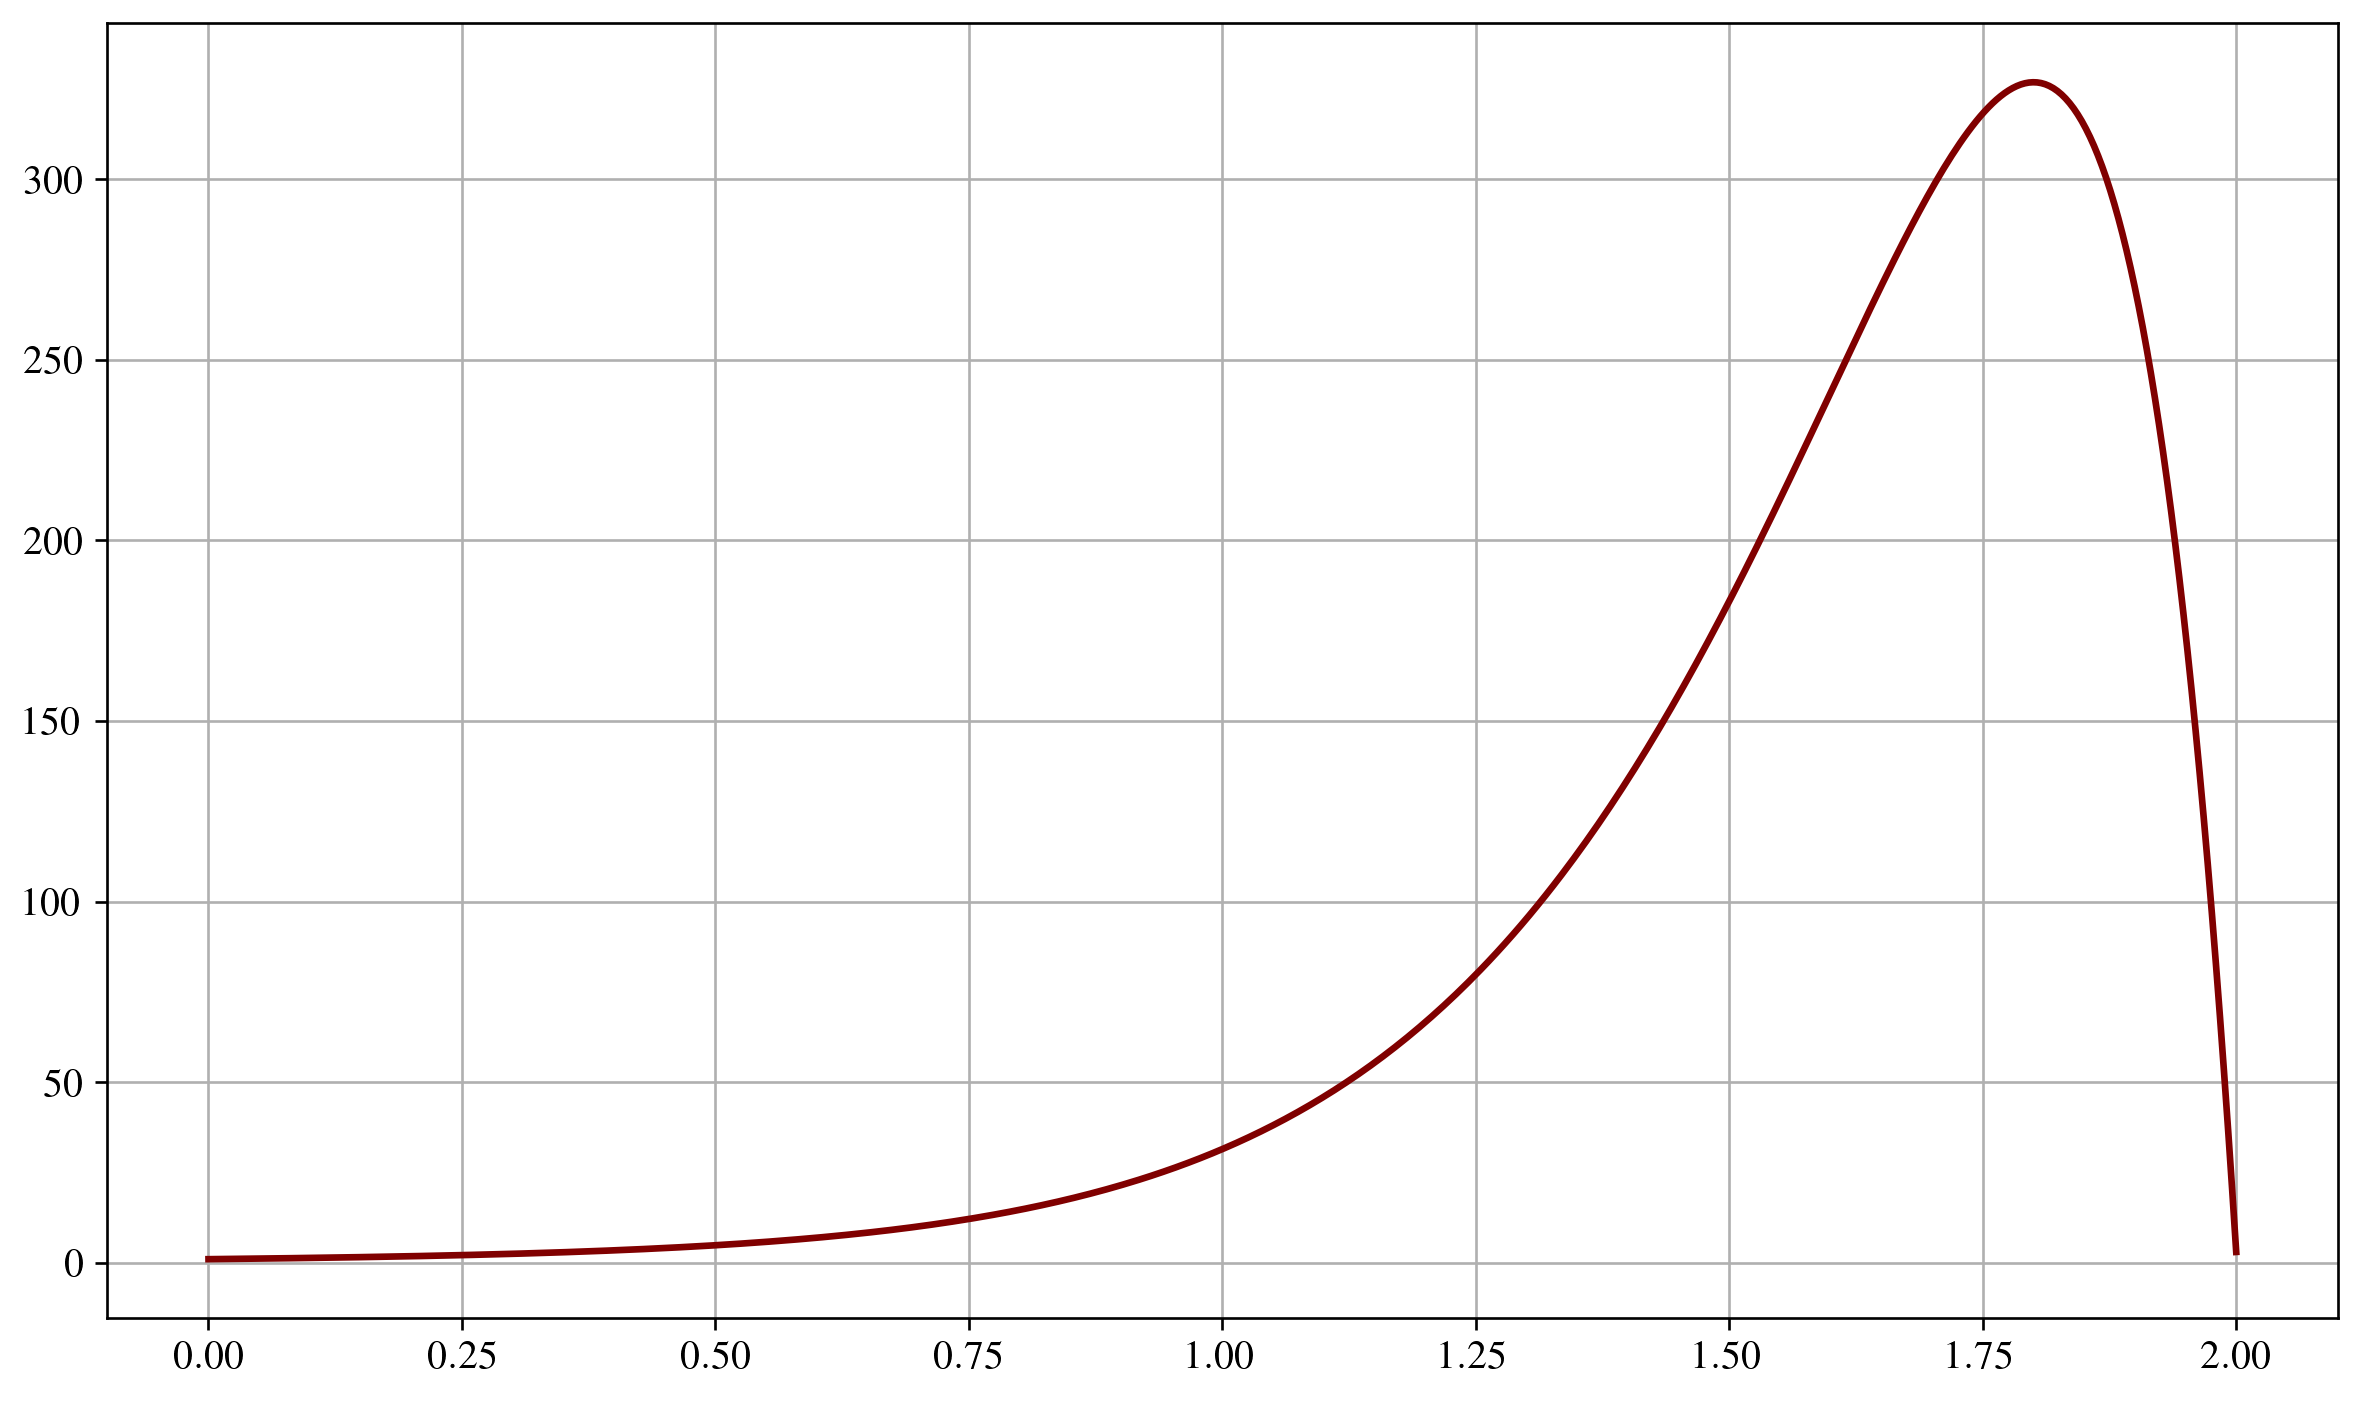

In [34]:
y_lamb = sp.lambdify(x, sol.rhs, modules='numpy')
t_ = np.linspace(0, 2, 500)  # array from 0 to 2 with a size of 500

plt.plot(t_, y_lamb(t_))
plt.show()

---

## Laplace Transforms
* Laplace transforms in `sympy` as of version 1.12 are lacking. A re-design of this part of the package is coming in a later version as seen [here](https://github.com/sympy/sympy/issues/24561).

---
**Example:** Find the laplace transform of $f(t)=2\cos(5t)$.

In [35]:
s, t = sp.symbols('s t')
sp.laplace_transform(2*sp.cos(5*t), t, s)[0]

2*s/(s**2 + 25)

---
**Example:** Solve the following ODE using laplace transforms:

$$\ddot{x}+20\dot{x}+1000=
\begin{cases}
t\ 0\le t<1 \\
1\ t\ge1
\end{cases}$$

The initial conditions are zero.

In [36]:
# sympy cannot do laplace transforms of piecewise functions yet, but that is in the works
# Instead, use the answer that was found by hand in class
X = sp.Function('X')(s)
eq = sp.Eq(s**2*X + 20*s*X + 1000*X, 1/s**2 - 1/s**2*sp.exp(-s))
eq

Eq(s**2*X(s) + 20*s*X(s) + 1000*X(s), s**(-2) - exp(-s)/s**2)

In [37]:
sol = sp.solve(eq, X)[0]
sol

(exp(s) - 1)*exp(-s)/(s**2*(s**2 + 20*s + 1000))

In [38]:
x_t = sp.inverse_laplace_transform(sol, s, t).simplify()
x_t

t*Heaviside(t)/1000 + (-exp(-10*t)*sin(30*t)/37500 + exp(-10*t)*cos(30*t)/50000)*Heaviside(t) - ((150*t - 153)*exp(10*t - 10) - 4*sin(30*t - 30) + 3*cos(30*t - 30))*exp(10 - 10*t)*Heaviside(t - 1)/150000 - Heaviside(t)/50000

* Note that the $\theta(t)$ is the heaviside function (or unit step function).

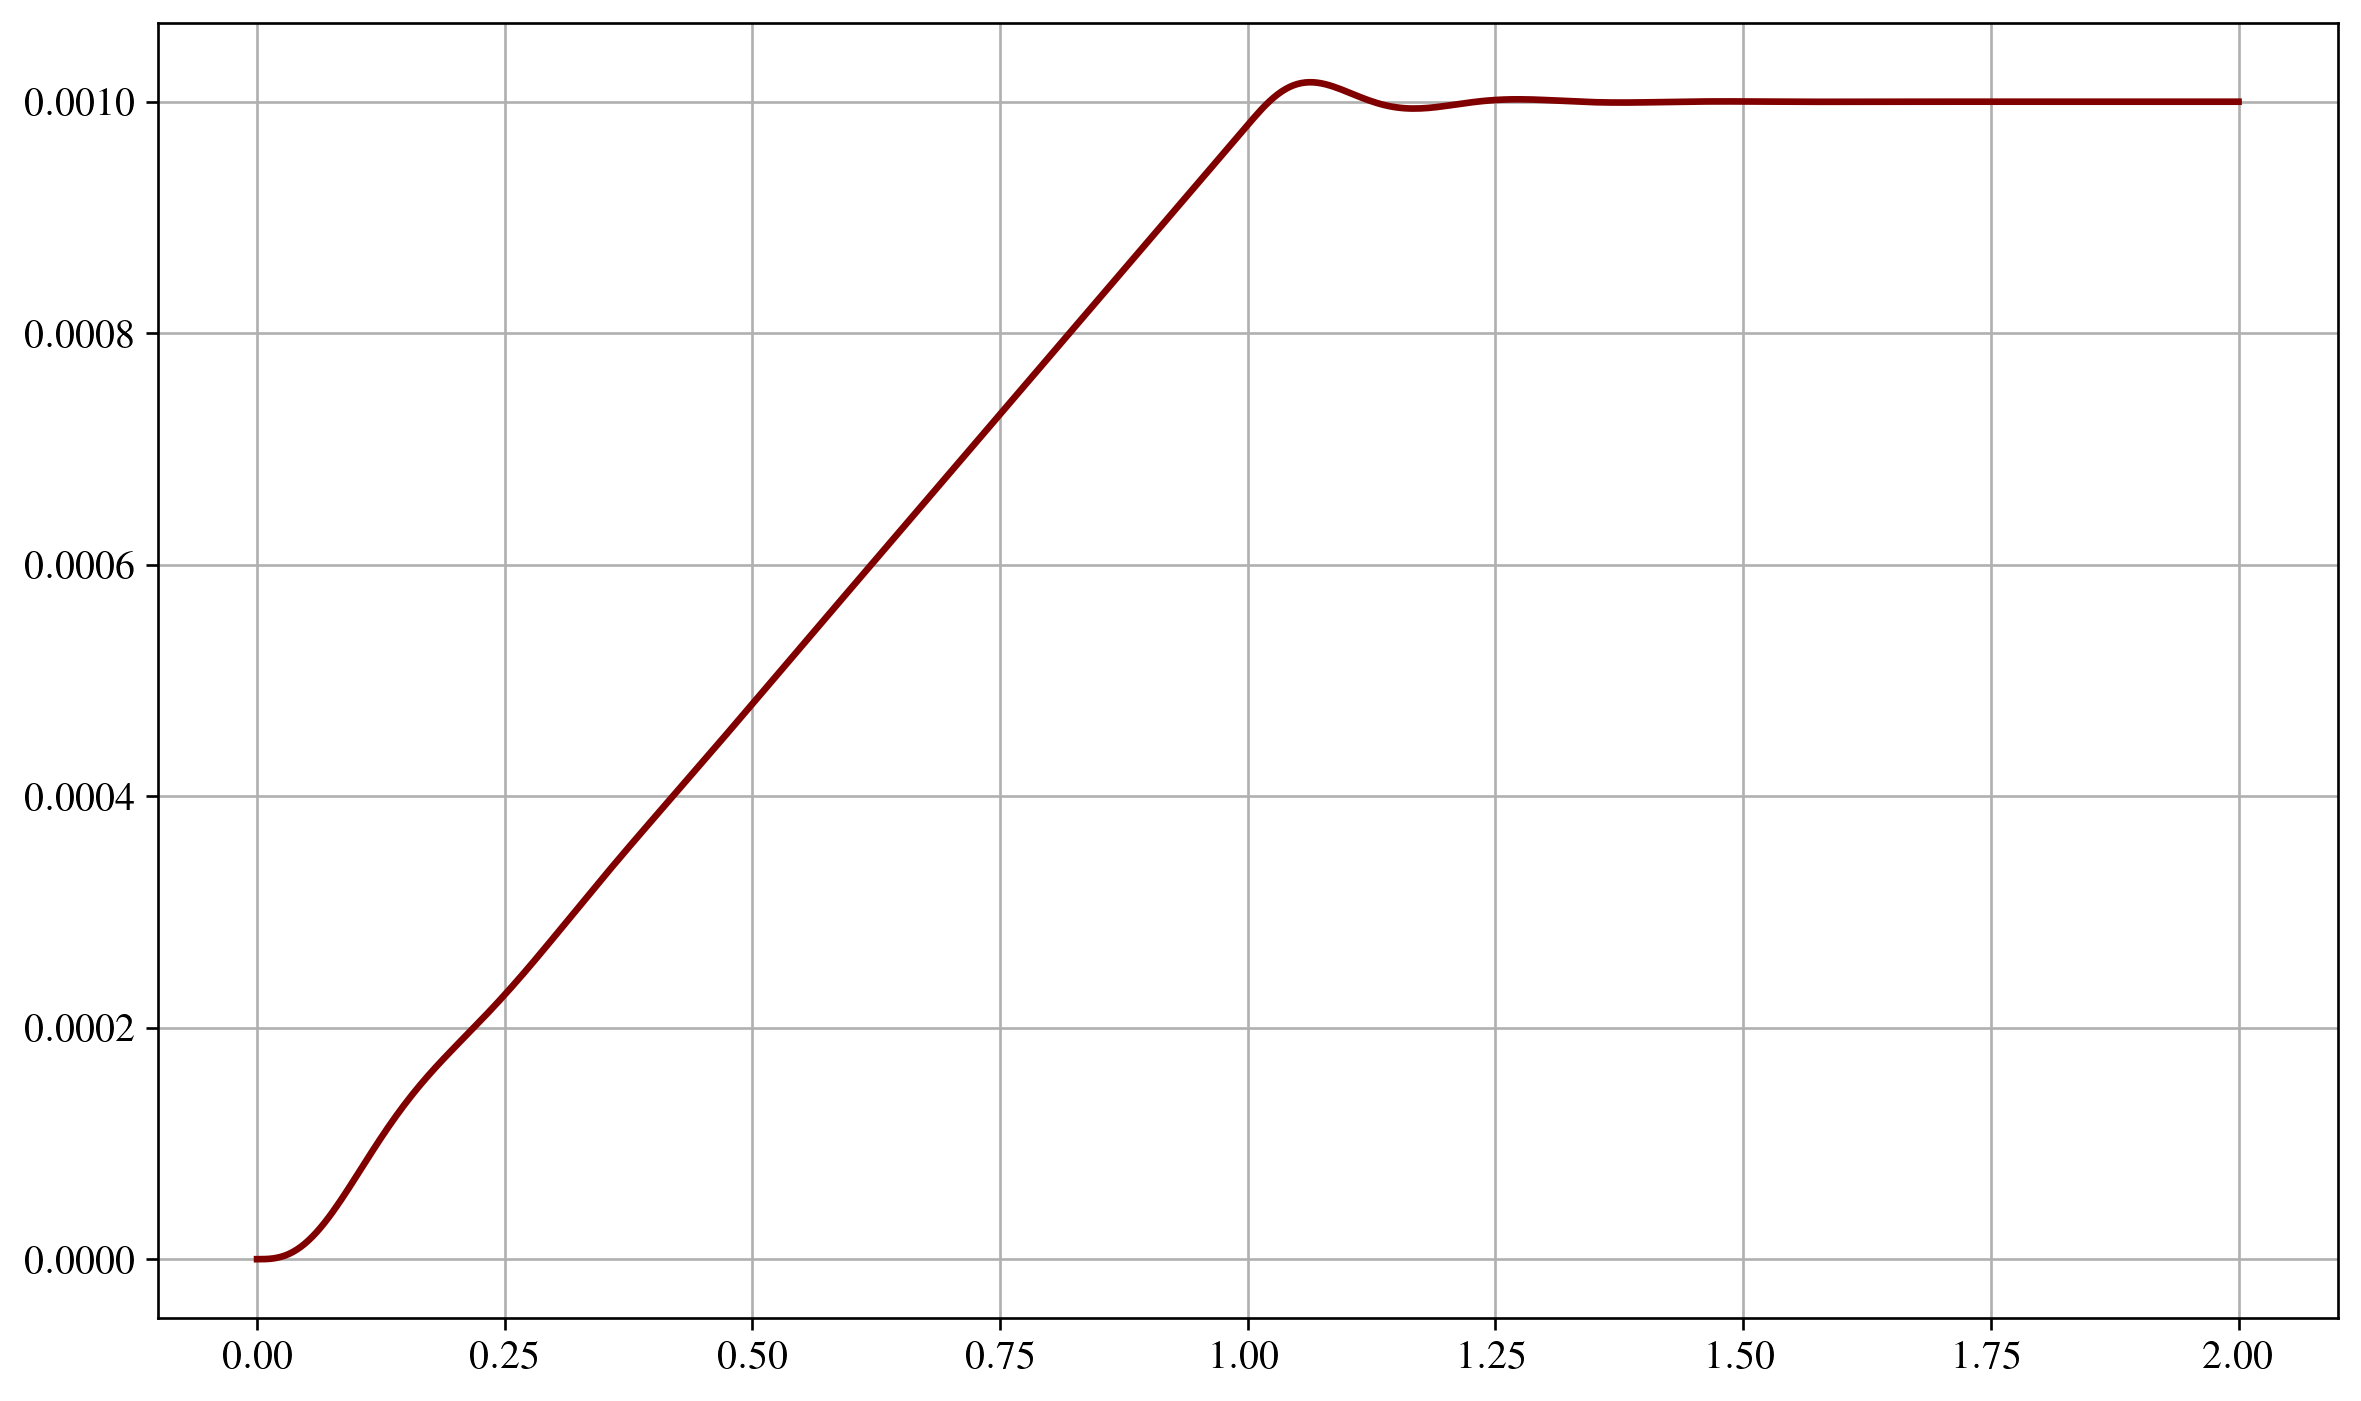

In [39]:
x_lamb = sp.lambdify(t, x_t, modules='numpy')
t_ = np.linspace(0, 2, 500)
plt.plot(t_, x_lamb(t_))
plt.show()

---

# Linear Algebra
* `sympy` is wonderful for visualizing matrices as it is able to output \LaTeX\ matrices through jupyter notebook.

---
**Example:** Solve the following system by converting it to the matrix form, then augment the solution vector and put the matrix in the reduced row echelon form.

$$\begin{cases}
x_1-x_2+2x_3=4 \\
x_2-3x_3=2
\end{cases}$$

In [40]:
x1, x2, x3 = sp.symbols('x1:4')  # defines sequence of symbols from 1 to 3
eq1 = sp.Eq(x1 - x2 + 2*x3, 4)
eq2 = sp.Eq(x2 - 3*x3, 2)
eq3 = sp.Eq(2*x1 + x2 - 4*x3, 2)
display(eq1, eq2, eq3)

Eq(x1 - x2 + 2*x3, 4)

Eq(x2 - 3*x3, 2)

Eq(2*x1 + x2 - 4*x3, 2)

In [41]:
# Convert it to the matrix form
A, b = sp.linear_eq_to_matrix([eq1, eq2, eq3], (x1, x2, x3))
sp.Eq(A*sp.Matrix([x1, x2, x3]), b)

Eq(Matrix([
[  x1 - x2 + 2*x3],
[       x2 - 3*x3],
[2*x1 + x2 - 4*x3]]), Matrix([
[4],
[2],
[2]]))

In [42]:
augmented = A.col_insert(3, b)
augmented

Matrix([
[1, -1,  2, 4],
[0,  1, -3, 2],
[2,  1, -4, 2]])

In [43]:
augmented.rref()[0]

Matrix([
[1, 0, 0,  -6],
[0, 1, 0, -34],
[0, 0, 1, -12]])